# Dry Bean Classification

### Prepare data


In [1]:
import numpy as np
import pandas as pd 
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.tree as tr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [2]:
path = 'F:/Swathy/machine_learning/Dataset/Dry_bean/Dry_Bean_Dataset.csv'
data = pd.read_csv(path)
data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [3]:
data.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860154,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [4]:
data.info()
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [5]:
data['Class'].value_counts()

Class
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: count, dtype: int64

Visualise the data

array([[<Axes: title={'center': 'Area'}>,
        <Axes: title={'center': 'Perimeter'}>,
        <Axes: title={'center': 'MajorAxisLength'}>,
        <Axes: title={'center': 'MinorAxisLength'}>],
       [<Axes: title={'center': 'AspectRation'}>,
        <Axes: title={'center': 'Eccentricity'}>,
        <Axes: title={'center': 'ConvexArea'}>,
        <Axes: title={'center': 'EquivDiameter'}>],
       [<Axes: title={'center': 'Extent'}>,
        <Axes: title={'center': 'Solidity'}>,
        <Axes: title={'center': 'roundness'}>,
        <Axes: title={'center': 'Compactness'}>],
       [<Axes: title={'center': 'ShapeFactor1'}>,
        <Axes: title={'center': 'ShapeFactor2'}>,
        <Axes: title={'center': 'ShapeFactor3'}>,
        <Axes: title={'center': 'ShapeFactor4'}>]], dtype=object)

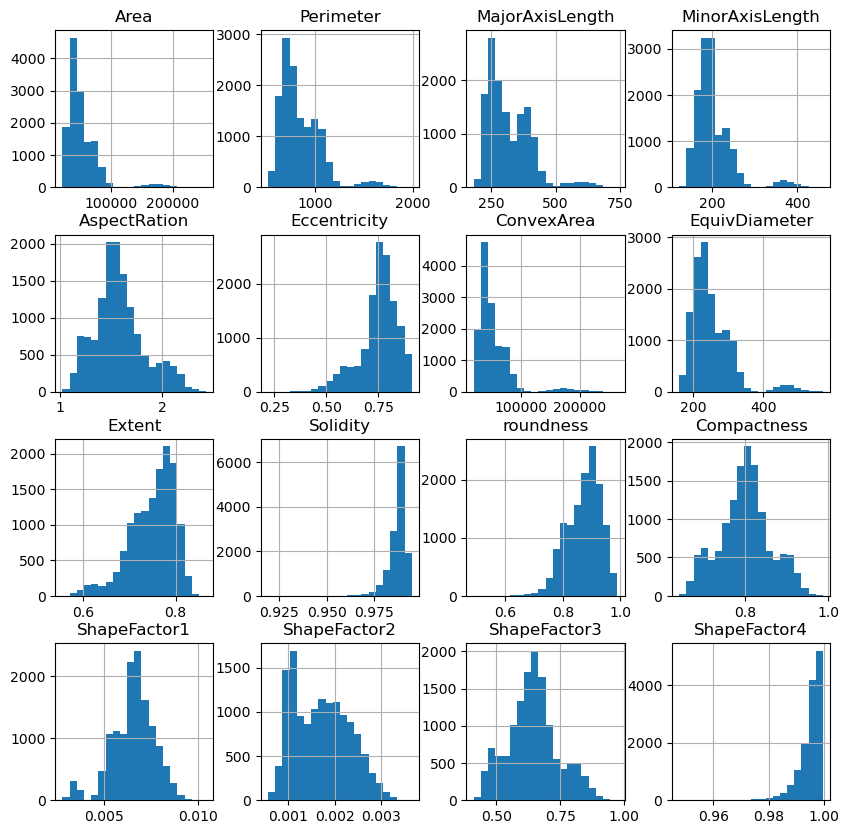

In [6]:
data.hist(bins=20,figsize=(10,10))

In [7]:
data.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [8]:
la_class=LabelEncoder()
data['Class_type']=la_class.fit_transform(data['Class'])
data

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class,Class_type
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER,5
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER,5
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER,5
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER,5
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON,3
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON,3
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON,3
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653247,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON,3


In [9]:
data_new=data.drop('Class',axis='columns')
data_new

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class_type
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,5
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,5
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,5
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,5
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,3
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,3
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,3
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653247,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,3


In [10]:
data_new.iloc[:,0:16]

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653247,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222


In [11]:
normalize = data_new.iloc[:,0:16]
scaler = preprocessing.StandardScaler()
normalize_scaled = scaler.fit_transform(normalize)
dataset_x = pd.DataFrame(normalize_scaled)
dataset_x.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
count,1.361100e+04,1.361100e+04,1.361100e+04,1.361100e+04,1.361100e+04,1.361100e+04,1.361100e+04,13611.000000,1.361100e+04,1.361100e+04,1.361100e+04,1.361100e+04,1.361100e+04,1.361100e+04,1.361100e+04,1.361100e+04
mean,3.341028e-17,6.682056e-17,2.672823e-16,2.338720e-16,-1.102539e-15,9.166946e-16,1.002308e-16,0.000000,-2.454612e-15,1.047412e-14,6.682056e-16,-1.169360e-16,1.002308e-15,-3.341028e-17,1.211123e-15,2.076449e-14
std,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00
min,-1.112719e+00,-1.542583e+00,-1.593407e+00,-1.773645e+00,-2.263655e+00,-5.782098e+00,-1.111184e+00,-1.551678,-3.960880e+00,-1.456945e+01,-6.446210e+00,-2.581167e+00,-3.356153e+00,-1.932991e+00,-2.356255e+00,-1.085036e+01
25%,-5.702102e-01,-7.082260e-01,-7.799910e-01,-5.875797e-01,-6.118921e-01,-3.800848e-01,-5.727750e-01,-0.642100,-6.335853e-01,-3.159612e-01,-6.919874e-01,-6.059668e-01,-5.884015e-01,-9.439029e-01,-6.286495e-01,-3.115721e-01
50%,-2.863377e-01,-2.816033e-01,-2.714228e-01,-2.187975e-01,-1.302079e-01,1.472404e-01,-2.885152e-01,-0.247169,2.063003e-01,2.446574e-01,1.659247e-01,2.289701e-02,7.231260e-02,-3.762059e-02,-1.561590e-02,3.029171e-01
75%,2.824987e-01,5.690149e-01,6.576317e-01,3.282530e-01,5.021578e-01,6.475228e-01,2.863522e-01,0.445835,7.562196e-01,6.159095e-01,7.323368e-01,5.575363e-01,6.275165e-01,7.624711e-01,5.294956e-01,6.456801e-01
max,6.874044e+00,5.273833e+00,4.886372e+00,5.735751e+00,3.434007e+00,1.744901e+00,7.036141e+00,5.345339,2.372678e+00,1.616807e+00,1.972582e+00,3.037363e+00,3.446551e+00,3.270983e+00,3.345475e+00,1.069377e+00


Training data and training signals/labels

In [12]:
# splitting training data and testing data
x=dataset_x
x

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.840749,-1.143319,-1.306598,-0.631153,-1.565053,-2.185720,-0.841451,-1.063341,0.289087,0.367614,1.423867,1.839116,0.680786,2.402173,1.925723,0.838371
1,-0.829188,-1.013924,-1.395911,-0.434445,-1.969784,-3.686040,-0.826102,-1.044217,0.697477,-0.462907,0.231054,2.495449,0.367967,3.100894,2.689702,0.771138
2,-0.807157,-1.078829,-1.252357,-0.585735,-1.514291,-2.045336,-0.808704,-1.008084,0.578195,0.518417,1.252865,1.764843,0.603129,2.235091,1.841356,0.916755
3,-0.785741,-0.977215,-1.278825,-0.439290,-1.741618,-2.742211,-0.773975,-0.973337,0.671260,-2.241767,0.515049,2.081715,0.401718,2.515075,2.204250,-0.197985
4,-0.781239,-1.097384,-1.380471,-0.266663,-2.117993,-4.535028,-0.784286,-0.966080,0.476020,0.804772,1.874992,2.765330,0.118268,3.270983,3.013462,0.939640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,-0.373471,-0.446083,-0.366669,-0.363055,-0.123703,0.153343,-0.378191,-0.364148,-0.716284,0.684173,0.727872,0.032433,0.261424,0.055629,-0.006086,0.760813
13607,-0.373334,-0.456336,-0.450053,-0.257015,-0.432979,-0.165141,-0.378662,-0.363962,1.022933,0.774384,0.818807,0.362794,0.110383,0.285117,0.328393,0.722659
13608,-0.372038,-0.447833,-0.450478,-0.246456,-0.448618,-0.182940,-0.376143,-0.362197,-0.403392,0.591370,0.758468,0.370533,0.104270,0.289205,0.336328,0.390251
13609,-0.371765,-0.427029,-0.428974,-0.266742,-0.380735,-0.106960,-0.372851,-0.361825,-0.903414,0.143717,0.581753,0.285098,0.141907,0.228375,0.248973,0.036440


In [13]:
y=data_new['Class_type']
y

0        5
1        5
2        5
3        5
4        5
        ..
13606    3
13607    3
13608    3
13609    3
13610    3
Name: Class_type, Length: 13611, dtype: int32

In [14]:
y.shape

(13611,)

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=5)
x_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
13570,-0.388476,-0.513639,-0.708379,0.062885,-1.290345,-1.505334,-0.391861,-0.384648,-0.033612,0.495920,1.164716,1.423202,-0.297530,1.123661,1.458751,0.392646
13520,-0.412552,-0.431364,-0.407095,-0.411680,-0.125225,0.151916,-0.413726,-0.417768,-0.560114,0.175648,0.185003,0.009983,0.356587,0.081019,-0.028511,-0.083740
9812,-0.079128,-0.066517,-0.018307,0.017882,-0.058761,0.213001,-0.088373,0.018238,-0.698109,1.042665,0.469542,-0.034164,-0.251413,-0.246634,-0.072496,0.757855
457,-0.577679,-0.767053,-0.971204,-0.174942,-1.477890,-1.949198,-0.581289,-0.653071,0.444682,0.687310,1.298141,1.704205,-0.002135,1.677193,1.772791,0.720683
9557,-0.145288,-0.099913,-0.073682,-0.073892,-0.023531,0.244436,-0.146377,-0.064686,0.949076,0.057639,0.141480,-0.092071,-0.116251,-0.230712,-0.129963,-0.030752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3046,0.813549,1.278226,0.912359,0.987127,0.128197,0.372846,0.826189,1.011459,-0.870316,-1.247029,-1.938102,-0.231347,-1.227110,-0.837590,-0.267124,0.353885
9917,-0.032169,0.036604,0.159738,-0.063790,0.368559,0.555560,-0.038665,0.076138,-0.313835,0.670885,0.094408,-0.458657,-0.138957,-0.529296,-0.487777,0.358956
4079,0.440225,0.653707,0.594608,0.605856,0.136298,0.379400,0.463622,0.620654,0.890622,-2.369696,-0.616588,-0.307133,-0.830972,-0.713767,-0.341132,-2.076609
2254,0.248669,0.586520,0.295413,0.460766,-0.138024,0.139878,0.246552,0.407489,0.772410,0.058599,-1.433406,0.040317,-0.743334,-0.423483,0.001799,0.517556


In [16]:
data['Class'].value_counts()

Class
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: count, dtype: int64

In [17]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
x_train, y_train = sm.fit_resample(x_train, y_train)

In [18]:
print(pd.Series(y_train).value_counts())

Class_type
3    2457
6    2457
5    2457
1    2457
0    2457
4    2457
2    2457
Name: count, dtype: int64


In [19]:
Log_cla = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)
Log_cla.fit(x_train,y_train)

C:\Users\kssan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200, multi_class='multinomial')

In [20]:
y_pred = Log_cla.predict(x_test)
print(y_pred)

[0 3 5 ... 2 5 5]


In [21]:
pd.DataFrame(y_pred).value_counts()

3    1052
6     790
5     640
4     577
2     497
0     366
1     162
Name: count, dtype: int64

In [22]:
# Evaluate the model
print(classification_report(y_test, Log_cla.predict(x_test)))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       374
           1       1.00      1.00      1.00       162
           2       0.94      0.95      0.94       491
           3       0.93      0.90      0.92      1089
           4       0.95      0.96      0.96       571
           5       0.94      0.94      0.94       642
           6       0.84      0.87      0.85       755

    accuracy                           0.92      4084
   macro avg       0.93      0.93      0.93      4084
weighted avg       0.92      0.92      0.92      4084



In [23]:
train_accuracy = Log_cla.score(x_train,y_train)
train_accuracy

0.9404035118320833

In [24]:
test_accuracy = Log_cla.score(x_test,y_test)
test_accuracy

0.9218903036238981

In [25]:
con = confusion_matrix(y_test,y_pred)
con

array([[343,   0,  22,   0,   1,   1,   7],
       [  0, 162,   0,   0,   0,   0,   0],
       [ 13,   0, 465,   0,   9,   0,   4],
       [  0,   0,   0, 982,   0,  19,  88],
       [  3,   0,   7,   5, 549,   0,   7],
       [  5,   0,   0,   9,   0, 604,  24],
       [  2,   0,   3,  56,  18,  16, 660]], dtype=int64)

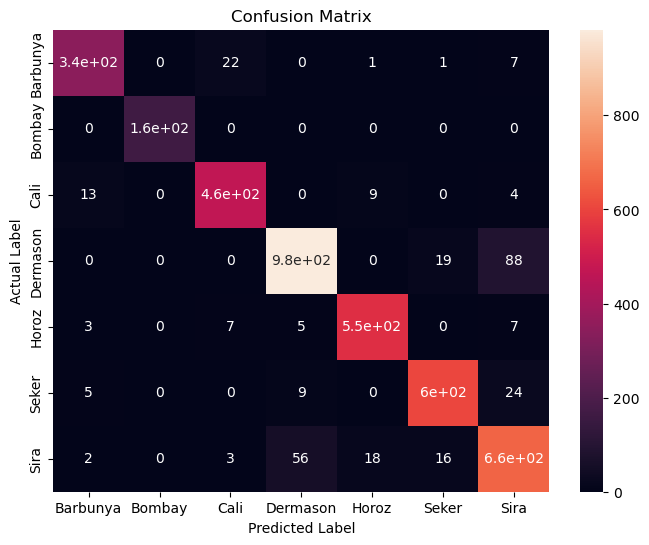

In [26]:
labels = ['Barbunya', 'Bombay', 'Cali', 'Dermason', 'Horoz', 'Seker', 'Sira']
plt.figure(figsize=(8, 6))
sns.heatmap(con,annot=True,xticklabels=labels,yticklabels=labels)
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [27]:
cm_train = confusion_matrix(y_train, Log_cla.predict(x_train))
cm_test = confusion_matrix(y_test, Log_cla.predict(x_test))

In [28]:
class_wise_accuracy_train = cm_train.diagonal() / cm_train.sum(axis=1)
class_wise_accuracy_test = cm_test.diagonal() / cm_test.sum(axis=1)

print("Training Set Accuracy by Class:")
for i, accuracy in enumerate(class_wise_accuracy_train):
    print(f"Class {i}: {accuracy:.2f}")

print("\nTesting Set Accuracy by Class:")
for i, accuracy in enumerate(class_wise_accuracy_test):
    print(f"Class {i}: {accuracy:.2f}")

Training Set Accuracy by Class:
Class 0: 0.94
Class 1: 1.00
Class 2: 0.96
Class 3: 0.89
Class 4: 0.96
Class 5: 0.95
Class 6: 0.88

Testing Set Accuracy by Class:
Class 0: 0.92
Class 1: 1.00
Class 2: 0.95
Class 3: 0.90
Class 4: 0.96
Class 5: 0.94
Class 6: 0.87


(4084,)
(4084, 7)


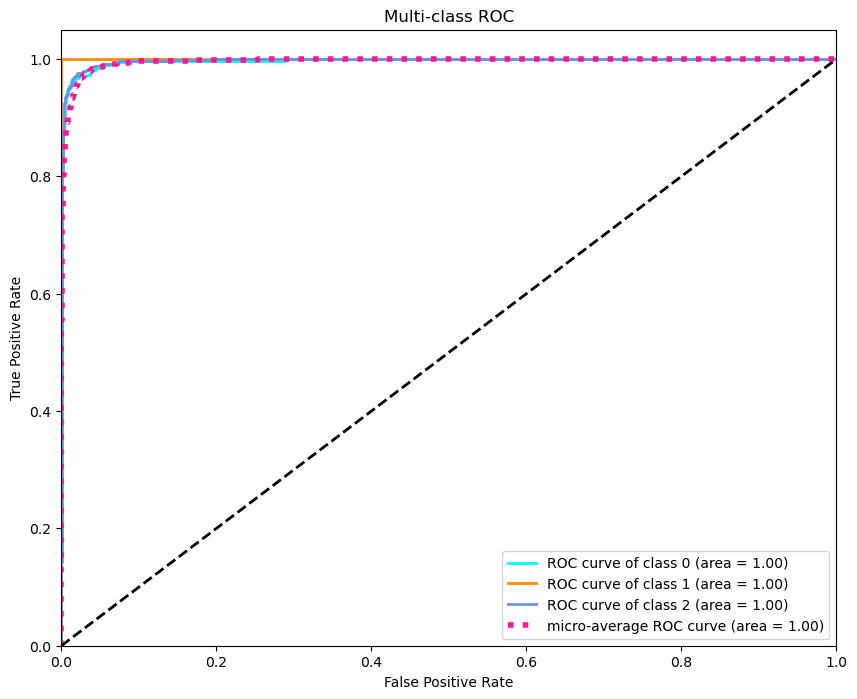

In [29]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize

# Binarize the output
y_test_binarized = label_binarize(y_test, classes=np.unique(y_train))
n_classes = y_test_binarized.shape[1]

# Predict probabilities
y_score = Log_cla.predict_proba(x_test)

print(y_test.shape)  # Should be (n_samples, n_classes)
print(y_score.shape)
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot all ROC curves
plt.figure(figsize=(10, 8))

colors = ['aqua', 'darkorange', 'cornflowerblue']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot(fpr["micro"], tpr["micro"], color='deeppink', linestyle=':', linewidth=4,
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC')
plt.legend(loc="lower right")
plt.show()


# KNN Classification

In [30]:
Acc_tr = []
Acc_tes = []
MD = []
for K in range(20):
    K = K+1
    knn_cla = KNeighborsClassifier(n_neighbors = K,metric='manhattan')
    knn_cla.fit(x_train, y_train)
    knn_cla.fit(x_test, y_test)
    Acc_tr.append(knn_cla.score(x_train, y_train))
    Acc_tes.append(knn_cla.score(x_test, y_test))
    MD.append(K)
    
print(MD)
print(Acc_tr)
print(Acc_tes) 


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
[0.9184836327693471, 0.9142391999534857, 0.9281934996220711, 0.92999592999593, 0.9321472178615036, 0.9333100761672191, 0.9321472178615036, 0.9324960753532182, 0.9311587883016454, 0.9322635036920751, 0.9319146462003605, 0.9324960753532182, 0.9315076457933601, 0.9322053607767894, 0.9317983603697889, 0.9317402174545032, 0.9317983603697889, 0.9315076457933601, 0.9317402174545032, 0.9319727891156463]
[1.0, 0.9539666993143977, 0.9473555337904016, 0.942458374142997, 0.9404995102840352, 0.9368266405484819, 0.9370714985308521, 0.9363369245837414, 0.9382957884427032, 0.9338883447600391, 0.93486777668952, 0.933643486777669, 0.9341332027424094, 0.9331537708129285, 0.935847208619001, 0.9353574926542605, 0.9333986287952988, 0.933643486777669, 0.9316846229187071, 0.9321743388834476]


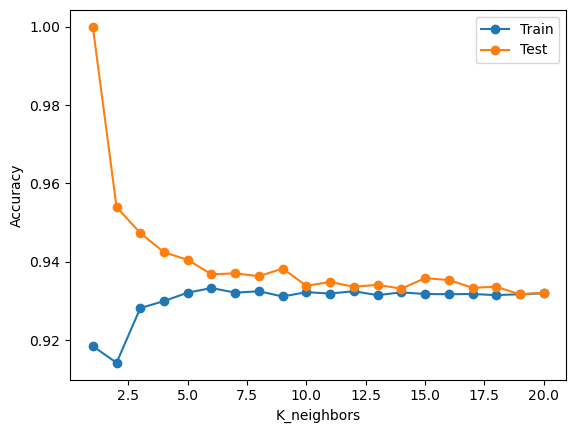

In [31]:
# Visulaize ACC
plt.figure()
plt.plot(MD, Acc_tr, label='Train',marker='o')
plt.plot(MD, Acc_tes, label='Test',marker='o')
plt.xlabel('K_neighbors')
plt.ylabel('Accuracy')
plt.legend()
plt.show() 

In [32]:
y_pred = knn_cla.predict(x_test)
y_pred

array([0, 3, 5, ..., 2, 5, 5])

In [33]:
# Evaluate the model
print(classification_report(y_test, knn_cla.predict(x_test)))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92       374
           1       1.00      1.00      1.00       162
           2       0.92      0.95      0.93       491
           3       0.92      0.95      0.94      1089
           4       0.97      0.95      0.96       571
           5       0.96      0.94      0.95       642
           6       0.88      0.88      0.88       755

    accuracy                           0.93      4084
   macro avg       0.94      0.94      0.94      4084
weighted avg       0.93      0.93      0.93      4084



In [34]:
train_accuracy = knn_cla.score(x_train,y_train)
train_accuracy

0.9319727891156463

In [35]:
test_accuracy = knn_cla.score(x_test,y_test)
test_accuracy

0.9321743388834476

In [36]:
con = confusion_matrix(y_test,knn_cla.predict(x_test))
con

array([[ 332,    0,   28,    0,    1,    0,   13],
       [   0,  162,    0,    0,    0,    0,    0],
       [  14,    0,  464,    0,    7,    0,    6],
       [   0,    0,    0, 1038,    0,   15,   36],
       [   1,    0,   11,    3,  544,    0,   12],
       [   1,    0,    0,   15,    0,  602,   24],
       [   0,    0,    1,   69,   11,    9,  665]], dtype=int64)

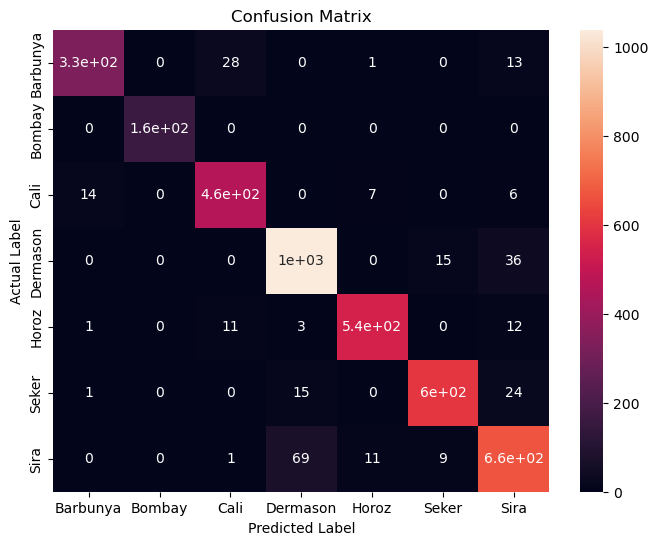

In [37]:
labels = ['Barbunya', 'Bombay', 'Cali', 'Dermason', 'Horoz', 'Seker', 'Sira']
plt.figure(figsize=(8, 6))
sns.heatmap(con,annot=True,xticklabels=labels,yticklabels=labels)
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [38]:
x=dataset_x
y=data_new['Class_type']

# Binarize the output for multi-class ROC analysis
y = label_binarize(y, classes=[0,1,2,3,4,5,6])
n_classes = y.shape[1]

In [39]:
x_train_knn,x_test_knn,y_train_knn,y_test_knn = train_test_split(x,y,test_size=0.3,random_state=5)
knn_cla.fit(x_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=20)

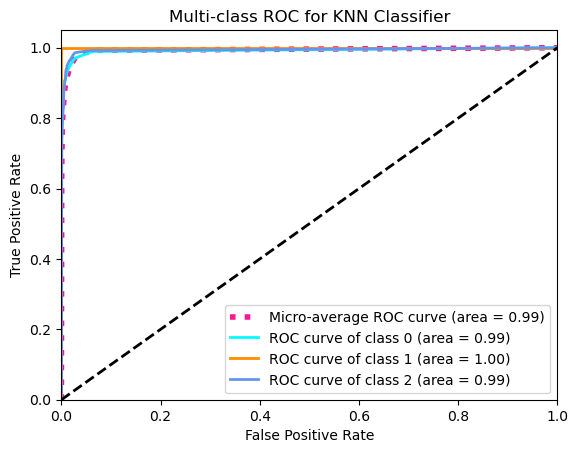

In [40]:

# Predict probabilities
y_score = knn_cla.predict_proba(x_test_knn)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_knn[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_knn.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot all ROC curves
plt.figure()

# Plot micro-average ROC curve
plt.plot(fpr["micro"], tpr["micro"], label='Micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]), color='deeppink', linestyle=':', linewidth=4)

# Plot ROC curve for each class
colors = ['aqua', 'darkorange', 'cornflowerblue']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC for KNN Classifier')
plt.legend(loc="lower right")
plt.show()


# Decision Tree

In [41]:
Dec_Tree_cla = DecisionTreeClassifier(random_state=5,max_depth=6)
Dec_Tree_cla.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=5)

In [42]:
y_pred = Dec_Tree_cla.predict(x_test)
y_pred

array([0, 3, 5, ..., 2, 5, 5])

In [43]:
# Evaluate the model
trACC=Dec_Tree_cla.score(x_train,y_train)
print(trACC)

0.9246467817896389


In [44]:
tesACC=Dec_Tree_cla.score(x_test,y_test)
print(tesACC)

0.9005876591576886


In [45]:
model = Dec_Tree_cla.fit(x_train, y_train)
text_representation = tr.export_text(Dec_Tree_cla)
print(text_representation)

|--- feature_12 <= -2.23
|   |--- feature_0 <= 2.16
|   |   |--- feature_11 <= 0.89
|   |   |   |--- class: 1
|   |   |--- feature_11 >  0.89
|   |   |   |--- class: 0
|   |--- feature_0 >  2.16
|   |   |--- class: 1
|--- feature_12 >  -2.23
|   |--- feature_2 <= 0.09
|   |   |--- feature_11 <= 0.99
|   |   |   |--- feature_1 <= -0.54
|   |   |   |   |--- feature_1 <= -0.70
|   |   |   |   |   |--- feature_7 <= -0.79
|   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |--- feature_7 >  -0.79
|   |   |   |   |   |   |--- class: 3
|   |   |   |   |--- feature_1 >  -0.70
|   |   |   |   |   |--- feature_3 <= -0.22
|   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |--- feature_3 >  -0.22
|   |   |   |   |   |   |--- class: 5
|   |   |   |--- feature_1 >  -0.54
|   |   |   |   |--- feature_10 <= -0.55
|   |   |   |   |   |--- feature_13 <= -0.35
|   |   |   |   |   |   |--- class: 4
|   |   |   |   |   |--- feature_13 >  -0.35
|   |   |   |   |   |   |--- class: 0
|   |   |   

[Text(0.2989583333333333, 0.9285714285714286, 'x[12] <= -2.226\ngini = 0.857\nsamples = 17199\nvalue = [2457, 2457, 2457, 2457, 2457, 2457, 2457]'),
 Text(0.1, 0.7857142857142857, 'x[0] <= 2.164\ngini = 0.001\nsamples = 2458\nvalue = [1, 2457, 0, 0, 0, 0, 0]'),
 Text(0.08333333333333333, 0.6428571428571429, 'x[11] <= 0.89\ngini = 0.278\nsamples = 6\nvalue = [1, 5, 0, 0, 0, 0, 0]'),
 Text(0.06666666666666667, 0.5, 'gini = 0.0\nsamples = 5\nvalue = [0, 5, 0, 0, 0, 0, 0]'),
 Text(0.1, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0, 0, 0, 0, 0]'),
 Text(0.11666666666666667, 0.6428571428571429, 'gini = 0.0\nsamples = 2452\nvalue = [0, 2452, 0, 0, 0, 0, 0]'),
 Text(0.4979166666666667, 0.7857142857142857, 'x[2] <= 0.087\ngini = 0.833\nsamples = 14741\nvalue = [2456, 0, 2457, 2457, 2457, 2457, 2457]'),
 Text(0.2625, 0.6428571428571429, 'x[11] <= 0.987\ngini = 0.698\nsamples = 7545\nvalue = [208, 0, 5, 2457, 178, 2452, 2245]'),
 Text(0.13333333333333333, 0.5, 'x[1] <= -0.54\ngini = 0.601\nsamp

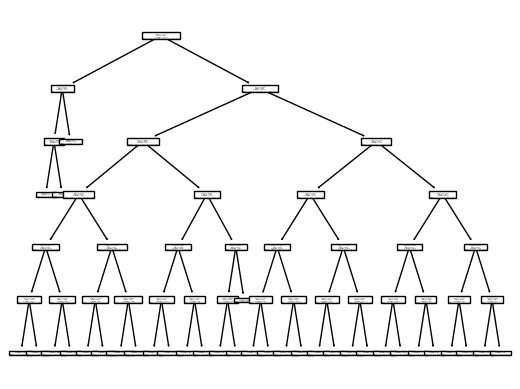

In [46]:
# To Visualize Decision Tree
from sklearn import tree
tree.plot_tree(model)

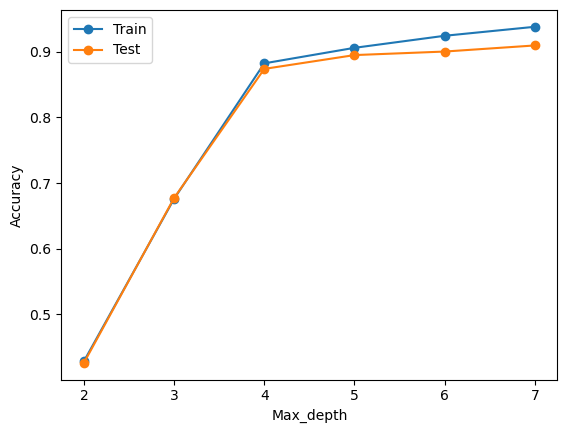

In [47]:
# Decision tree
trACC=[]
tesACC=[]
MD=[]

for i in range(2,8):
    #Create a Decision Tree classifier with the current max_depth
    DT=tr.DecisionTreeClassifier(max_depth=i)
    DT.fit(x_train,y_train)
    trACC.append(DT.score(x_train,y_train))
    tesACC.append(DT.score(x_test,y_test))
    MD.append(i)
#print(trACC)
#print(tesACC)
#print(MD)
plt.figure()
plt.plot(MD, trACC, label='Train',marker='o')
plt.plot(MD, tesACC, label='Test', marker='o')
plt.xlabel('Max_depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
#print(trACC)
#print(tesACC)

In [48]:
con = confusion_matrix(y_test,Dec_Tree_cla.predict(x_test))
con

array([[306,   0,  50,   0,   5,   4,   9],
       [  0, 162,   0,   0,   0,   0,   0],
       [ 22,   0, 456,   0,   9,   0,   4],
       [  4,   0,   0, 998,   0,  25,  62],
       [  2,   0,  16,   8, 535,   0,  10],
       [  5,   0,   0,  10,   0, 604,  23],
       [ 13,   0,  12,  64,  19,  30, 617]], dtype=int64)

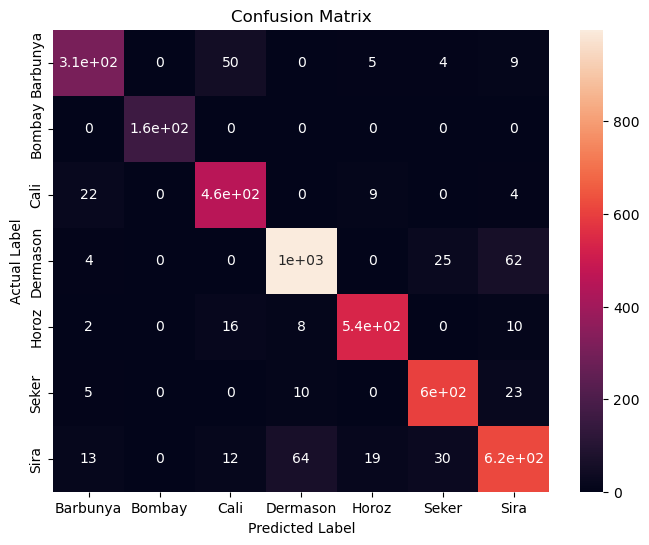

In [49]:
labels = ['Barbunya', 'Bombay', 'Cali', 'Dermason', 'Horoz', 'Seker', 'Sira']
plt.figure(figsize=(8, 6))
sns.heatmap(con,annot=True,xticklabels=labels,yticklabels=labels)
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [50]:
x=dataset_x
y=data_new['Class_type']

# Binarize the output for multi-class ROC analysis
y = label_binarize(y, classes=[0,1,2,3,4,5,6])
n_classes = y.shape[1]


In [51]:
x_train_dt,x_test_dt,y_train_dt,y_test_dt = train_test_split(x,y,test_size=0.3,random_state=5)
Dec_Tree_cla.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=5)

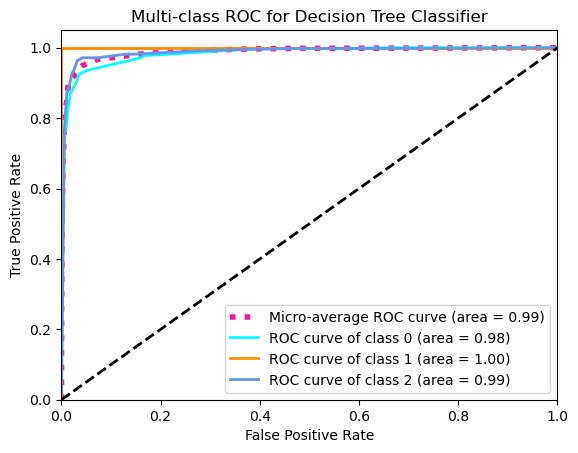

In [52]:
# Predict probabilities
y_score = Dec_Tree_cla.predict_proba(x_test_dt)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_dt[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_dt.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot all ROC curves
plt.figure()

# Plot micro-average ROC curve
plt.plot(fpr["micro"], tpr["micro"], label='Micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]), color='deeppink', linestyle=':', linewidth=4)

# Plot ROC curve for each class
colors = ['aqua', 'darkorange', 'cornflowerblue']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC for Decision Tree Classifier')
plt.legend(loc="lower right")
plt.show()

# Random Forest

In [53]:
random_forest_cla = RandomForestClassifier(n_estimators=100, random_state=5,max_depth=6)
random_forest_cla.fit(x_train, y_train)


RandomForestClassifier(max_depth=6, random_state=5)

In [54]:
y_pred = random_forest_cla.predict(x_test)
y_pred

array([0, 3, 5, ..., 2, 5, 5])

In [55]:
# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.86      0.86       374
           1       1.00      1.00      1.00       162
           2       0.90      0.88      0.89       491
           3       0.94      0.88      0.91      1089
           4       0.97      0.94      0.95       571
           5       0.96      0.92      0.94       642
           6       0.78      0.90      0.84       755

    accuracy                           0.90      4084
   macro avg       0.91      0.91      0.91      4084
weighted avg       0.91      0.90      0.90      4084



In [56]:
train_accuracy = random_forest_cla.score(x_train,y_train)*100
train_accuracy

92.63329263329263

In [57]:
test_accuracy = random_forest_cla.score(x_test,y_test)*100
test_accuracy

90.13222331047992

In [58]:
con = confusion_matrix(y_test,random_forest_cla.predict(x_test))
con

array([[321,   0,  36,   0,   1,   0,  16],
       [  0, 162,   0,   0,   0,   0,   0],
       [ 45,   0, 433,   0,  10,   0,   3],
       [  0,   0,   0, 959,   0,  18, 112],
       [  4,   0,  11,   5, 535,   0,  16],
       [  3,   0,   0,   8,   0, 592,  39],
       [  3,   0,   3,  53,   8,   9, 679]], dtype=int64)

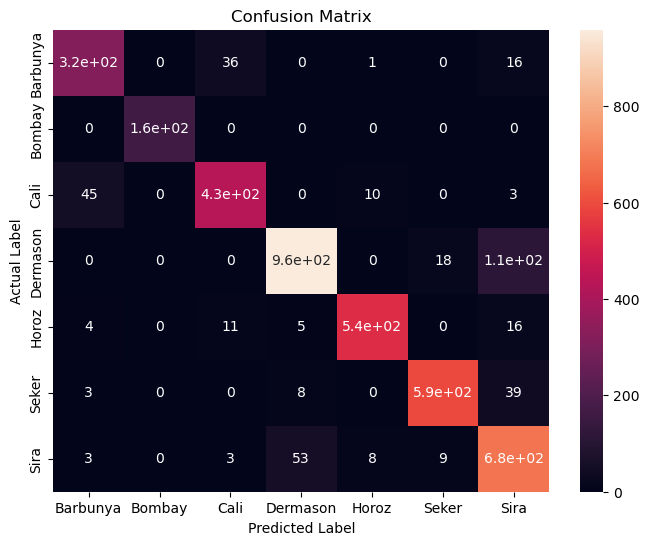

In [59]:
labels = ['Barbunya', 'Bombay', 'Cali', 'Dermason', 'Horoz', 'Seker', 'Sira']
plt.figure(figsize=(8, 6))
sns.heatmap(con,annot=True,xticklabels=labels,yticklabels=labels)
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [60]:
x=dataset_x
y=data_new['Class_type']

# Binarize the output for multi-class ROC analysis
y = label_binarize(y, classes=[0,1,2,3,4,5,6])
n_classes = y.shape[1]

In [61]:
x_train_rf,x_test_rf,y_train_rf,y_test_rf = train_test_split(x,y,test_size=0.3,random_state=5)
random_forest_cla.fit(x_train, y_train)

RandomForestClassifier(max_depth=6, random_state=5)

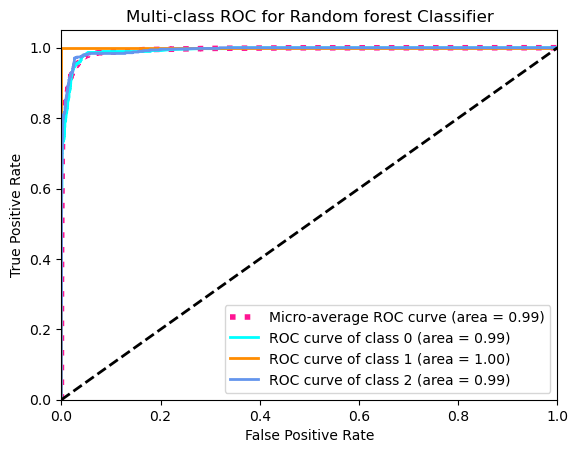

In [62]:
# Predict probabilities
y_score = random_forest_cla.predict_proba(x_test_rf)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_rf[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_rf.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot all ROC curves
plt.figure()

# Plot micro-average ROC curve
plt.plot(fpr["micro"], tpr["micro"], label='Micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]), color='deeppink', linestyle=':', linewidth=4)

# Plot ROC curve for each class
colors = ['aqua', 'darkorange', 'cornflowerblue']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC for Random forest Classifier')
plt.legend(loc="lower right")
plt.show()

# SVM

In [63]:
SVM_cla = SVC(kernel='linear',probability=True)
SVM_cla.fit(x_train, y_train)
y_pred = SVM_cla.predict(x_test)

In [64]:
# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       374
           1       1.00      1.00      1.00       162
           2       0.94      0.95      0.95       491
           3       0.93      0.91      0.92      1089
           4       0.95      0.96      0.96       571
           5       0.95      0.94      0.94       642
           6       0.85      0.88      0.86       755

    accuracy                           0.93      4084
   macro avg       0.94      0.94      0.94      4084
weighted avg       0.93      0.93      0.93      4084



In [65]:
train_accuracy = SVM_cla.score(x_train,y_train)*100
train_accuracy

94.30199430199431

In [66]:
test_accuracy = SVM_cla.score(x_test,y_test)*100
test_accuracy

92.67874632713027

In [67]:
con = confusion_matrix(y_test,SVM_cla.predict(x_test))
con

array([[348,   0,  18,   0,   1,   1,   6],
       [  0, 162,   0,   0,   0,   0,   0],
       [ 15,   0, 465,   0,   8,   0,   3],
       [  0,   0,   0, 995,   0,  16,  78],
       [  2,   0,   9,   5, 550,   0,   5],
       [  4,   0,   0,  10,   0, 602,  26],
       [  3,   0,   1,  57,  17,  14, 663]], dtype=int64)

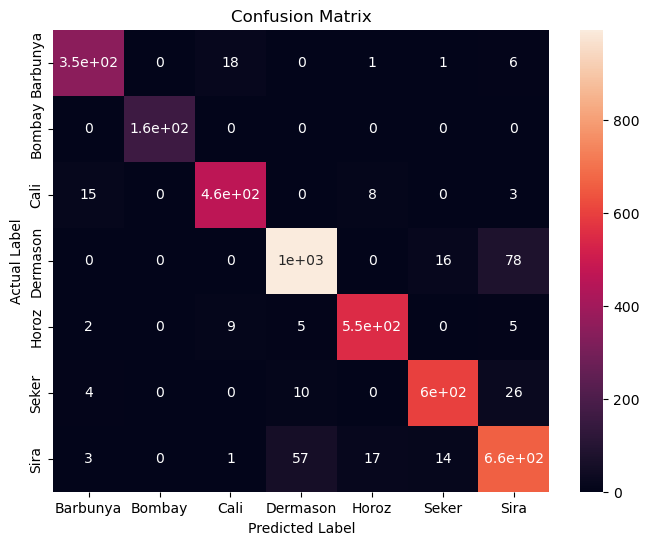

In [68]:
labels = ['Barbunya', 'Bombay', 'Cali', 'Dermason', 'Horoz', 'Seker', 'Sira']
plt.figure(figsize=(8, 6))
sns.heatmap(con,annot=True,xticklabels=labels,yticklabels=labels)
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [69]:
x=dataset_x
y=data_new['Class_type']

# Binarize the output for multi-class ROC analysis
y = label_binarize(y, classes=[0,1,2,3,4,5,6])
n_classes = y.shape[1]

In [70]:
x_train_svm,x_test_svm,y_train_svm,y_test_svm = train_test_split(x,y,test_size=0.3,random_state=5)
SVM_cla.fit(x_train, y_train)

SVC(kernel='linear', probability=True)

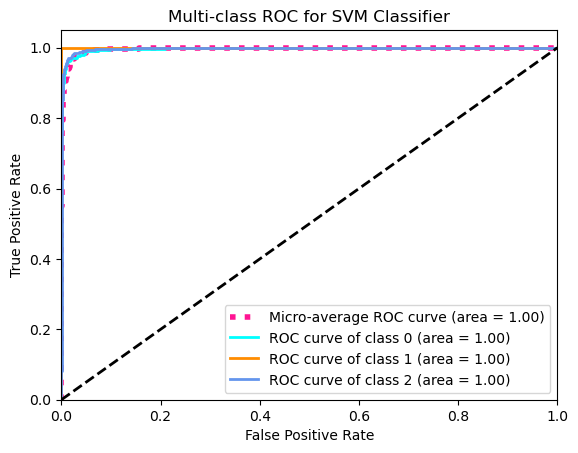

In [82]:
# Predict probabilities
y_score = SVM_cla.predict_proba(x_test_svm)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_svm[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_svm.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot all ROC curves
plt.figure()

# Plot micro-average ROC curve
plt.plot(fpr["micro"], tpr["micro"], label='Micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]), color='deeppink', linestyle=':', linewidth=4)

# Plot ROC curve for each class
colors = ['aqua', 'darkorange', 'cornflowerblue']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC for SVM Classifier')
plt.legend(loc="lower right")
plt.show()

In [83]:
x=dataset_x
y=data_new['Class_type']

In [84]:
kf = KFold(n_splits=3)
kf

KFold(n_splits=3, random_state=None, shuffle=False)

In [85]:
for train_index, test_index in kf.split([1,2,3,4,5,6,7,8,9]):
    print(train_index, test_index)

[3 4 5 6 7 8] [0 1 2]
[0 1 2 6 7 8] [3 4 5]
[0 1 2 3 4 5] [6 7 8]


In [86]:
def get_score(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    return model.score(x_test, y_test)

print(get_score(LogisticRegression(),x_train,x_test,y_train,y_test))
print(get_score(KNeighborsClassifier(),x_train,x_test,y_train,y_test))
print(get_score(DecisionTreeClassifier(),x_train,x_test,y_train,y_test))
print(get_score(RandomForestClassifier(),x_train,x_test,y_train,y_test))
print(get_score(SVC(),x_train,x_test,y_train,y_test))

C:\Users\kssan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9221351616062684
0.9204211557296768
0.8983839373163565
0.9272771792360431
0.9321743388834476


In [87]:
y.shape

(13611,)

In [88]:
cross_val_score(LogisticRegression(solver='lbfgs',multi_class='multinomial'),x,y,cv=3)

C:\Users\kssan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\kssan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

array([0.71346705, 0.97641613, 0.66894424])

In [89]:
cross_val_score(KNeighborsClassifier(n_neighbors = 3),x, y,cv=3)

array([0.75754904, 0.92726471, 0.69737712])

In [90]:
cross_val_score(DecisionTreeClassifier(max_depth=6),x, y,cv=3)

array([0.53691867, 0.72228345, 0.27859819])

In [91]:
cross_val_score(RandomForestClassifier(n_estimators=40),x, y,cv=3)

array([0.38681948, 0.69385056, 0.2323121 ])

In [92]:
cross_val_score(SVC(gamma='auto'),x,y,cv=3)

array([0.72823452, 0.97377121, 0.68194842])

Parameter tunning using k fold cross validation

Random Forest

In [93]:
scores1 = cross_val_score(RandomForestClassifier(n_estimators=10),x, y, cv=10)
np.average(scores1)

0.7115805192044806

In [94]:
scores2 = cross_val_score(RandomForestClassifier(n_estimators=20),x, y, cv=10)
np.average(scores2)

0.7213477824135963

In [95]:
scores3 = cross_val_score(RandomForestClassifier(n_estimators=30),x, y, cv=10)
np.average(scores3)

0.7246538510920427

In [96]:
scores4 = cross_val_score(RandomForestClassifier(n_estimators=40),x, y, cv=10)
np.average(scores4)

0.7286948354680036

In [97]:
scores6 = cross_val_score(RandomForestClassifier(n_estimators=70),x, y, cv=10)
np.average(scores6)

0.7266382259740344

KNN

In [98]:
scores1 =cross_val_score(KNeighborsClassifier(n_neighbors = 4),x, y,cv=3)
np.average(scores1)

0.7994269340974212

In [99]:
scores2 =cross_val_score(KNeighborsClassifier(n_neighbors = 5),x, y,cv=3)
np.average(scores2)

0.8062596429358607

In [100]:
scores3 =cross_val_score(KNeighborsClassifier(n_neighbors = 6),x, y,cv=3)
np.average(scores3)

0.8106678421864668

In [101]:
scores4 =cross_val_score(KNeighborsClassifier(n_neighbors = 7),x, y,cv=3)
np.average(scores4)

0.8154433913746235

In [102]:
scores5 =cross_val_score(KNeighborsClassifier(n_neighbors = 8),x, y,cv=3)
np.average(scores5)

0.8175005510249064

In [103]:
scores6 =cross_val_score(KNeighborsClassifier(n_neighbors = 9),x, y,cv=3)
np.average(scores6)

0.8216148703254721

In [104]:
scores7 =cross_val_score(KNeighborsClassifier(n_neighbors = 10),x, y,cv=3)
np.average(scores7)

0.8206597604878407

Decision Tree

In [105]:
scores1 = cross_val_score(DecisionTreeClassifier(max_depth=5),x, y,cv=3)
np.average(scores1)

0.565425023877746

In [106]:
scores2 = cross_val_score(DecisionTreeClassifier(max_depth=7),x, y,cv=3)
np.average(scores2)

0.5018734846815076

In [107]:
scores3 = cross_val_score(DecisionTreeClassifier(max_depth=8),x, y,cv=3)
np.average(scores3)

0.4993755051061642

Logistic Regression

In [108]:
scores = cross_val_score(LogisticRegression(solver='lbfgs',multi_class='multinomial'), x, y,cv=3)
np.average(scores)

C:\Users\kssan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\kssan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

0.7862758063331129

SVM

In [109]:
scores = cross_val_score(SVC(gamma='auto'), x, y,cv=3)
np.average(scores)

0.7946513849092646

In [110]:
from sklearn.model_selection import GridSearchCV

In [111]:
dual=[True,False]
max_iter=[100,110,120,130,140]
param_grid = dict(dual=dual,max_iter=max_iter)

Logistic Regression

In [112]:
import time

lr = LogisticRegression(solver='lbfgs',multi_class='multinomial')
grid = GridSearchCV(estimator=lr, param_grid=param_grid, cv = 3, n_jobs=-1)

start_time = time.time()
grid_result = grid.fit(x, y)
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

C:\Users\kssan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\kssan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\kssan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\kssan\anaconda3\Lib\site-packages\sklearn\linear_model\_lo

Best: 0.786276 using {'dual': False, 'max_iter': 100}
Execution time: 6.580571889877319 ms


C:\Users\kssan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [113]:
# Evaluate on the test set
best_model = grid.best_estimator_
test_score = best_model.score(x_test, y_test)
print(f"Test set accuracy: {test_score}")

Test set accuracy: 0.928256611165524


KNN

In [114]:
k_range = list(range(1, 31))
print(k_range)

param_grid = dict(n_neighbors=k_range)
print(param_grid)

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10, scoring='accuracy', return_train_score=False)
grid.fit(x, y)

grid_mean_scores = grid.cv_results_['mean_test_score']
print(grid_mean_scores)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}
[0.85858357 0.85770348 0.87989132 0.88341841 0.88510721 0.88554871
 0.88473994 0.88819355 0.88929482 0.89113203 0.89127828 0.89230742
 0.89252741 0.89238062 0.8913517  0.89267442 0.89333526 0.89340885
 0.8940698  0.89377617 0.89451044 0.89421675 0.89465728 0.89421675
 0.89487765 0.89414317 0.89480429 0.89458386 0.89443686 0.89406959]


In [115]:
# Best parameters and score
print(f"Best parameters found: {grid.best_params_}")
print(f"Best cross-validation score: {grid.best_score_}")

# Evaluate on the test set
best_model = grid.best_estimator_
test_score = best_model.score(x_test, y_test)
print(f"Test set accuracy: {test_score}")

Best parameters found: {'n_neighbors': 25}
Best cross-validation score: 0.8948776543117967
Test set accuracy: 0.9360920666013712


SVM

In [116]:
# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': [1, 0.1, 0.01, 0.001],  # Kernel coefficient for 'rbf', 'poly' and 'sigmoid'
    'kernel': ['rbf', 'poly', 'sigmoid']  # Type of SVM kernel to be used
}

# Initialize SVM model
svm_model = SVC()

# Set up GridSearchCV
grid_search = GridSearchCV(svm_model, param_grid, refit=True, verbose=2, cv=5)

# Perform grid search
grid_search.fit(x_train, y_train)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   9.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   9.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  10.2s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  10.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   9.9s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   1.6s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   1.8s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   2.1s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   2.2s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   2.1s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=  15.6s
[CV] END .....................C=0.1, gamma=1, k

[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time=   1.3s
[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time=   1.8s
[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time=   1.7s
[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time=   1.7s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   4.2s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   4.2s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   4.4s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   3.2s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   4.5s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=  11.9s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=  13.5s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=  15.1s
[CV] END ...................

[CV] END ......................C=100, gamma=0.1, kernel=poly; total time=   1.2s
[CV] END ......................C=100, gamma=0.1, kernel=poly; total time=   0.8s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   2.9s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   2.7s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   2.9s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   3.5s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   2.6s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.7s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.8s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.8s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.9s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.8s
[CV] END ...................

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=2)

In [117]:
# Best parameter after grid search
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")

# Evaluate the best model found by Grid Search on the test set
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(x_test, y_test)
print(f"Test set accuracy: {test_accuracy}")

Best parameters found: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
Best cross-validation score: 0.9584869688998289
Test set accuracy: 0.9182174338883448


Random Forest

In [118]:
# Define the parameter grid
param_grid = {
    'n_estimators': [10, 50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Initialize the model
rf = RandomForestClassifier()

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

# Perform grid search
grid_search.fit(x_train, y_train)

# Best parameters and score
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")

# Evaluate on the test set
best_model = grid_search.best_estimator_
test_score = best_model.score(x_test, y_test)
print(f"Test set accuracy: {test_score}")


Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best parameters found: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation score: 0.9545912650378355
Test set accuracy: 0.9275220372184133


In [119]:
x_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
2021,0.124295,0.364420,-0.182802,0.784157,-1.221920,-1.361785,0.133298,0.263729,0.564190,-1.121159,-0.932739,1.337435,-1.057641,0.490923,1.364111,0.688320
7444,-0.648545,-0.762932,-0.636826,-0.859503,0.161575,0.399664,-0.649839,-0.758878,-0.183244,0.333802,0.340656,-0.260142,1.099515,0.169417,-0.295295,0.480951
578,-0.552204,-0.756063,-0.936089,-0.145358,-1.449145,-1.875780,-0.558954,-0.615783,0.836997,1.198364,1.517974,1.669302,-0.047649,1.598649,1.733454,0.957577
9324,-0.197227,-0.173405,-0.110127,-0.175205,0.061218,0.317511,-0.200518,-0.130947,0.702629,0.366091,0.236856,-0.167216,0.008929,-0.235241,-0.204152,0.300596
13044,-0.535221,-0.626794,-0.532202,-0.635099,-0.011438,0.255080,-0.539004,-0.591134,-1.006025,0.676811,0.500058,-0.089022,0.696827,0.149857,-0.126943,0.508347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1724,-0.280301,-0.414223,-0.582124,0.204824,-1.237723,-1.394167,-0.287776,-0.239190,0.681619,0.997636,1.436501,1.363456,-0.474258,0.931536,1.392764,0.823325
2213,0.201675,0.357555,0.183242,0.498036,-0.358320,-0.082583,0.201076,0.353694,-1.010594,-0.088773,-0.337684,0.258842,-0.769238,-0.267535,0.222239,-0.023428
4972,0.885165,0.940330,1.015838,1.020279,0.233730,0.455989,0.865384,1.083172,1.202451,1.328983,0.263708,-0.339686,-1.249662,-0.915921,-0.372786,0.102435
495,-0.569801,-0.800061,-0.984184,-0.122498,-1.560022,-2.171462,-0.576318,-0.641499,1.090743,1.182187,1.734515,1.820436,-0.066246,1.771551,1.904465,0.497846


In [120]:
y_test

2021     5
7444     6
578      5
9324     6
13044    3
        ..
1724     5
2213     0
4972     2
495      5
376      5
Name: Class_type, Length: 4084, dtype: int32

In [126]:
y_pred = Log_cla.predict([[0.055165,1.0330,1.1583,0.920279,0.533730,1.00989,0.0525384,1.183172,1.002451,0.05983,0.263708,-1.02686,-1.249662,-0.455921,-0.572786,0.5435]])
y_pred

array([2])

In [127]:
y_pred = knn_cla.predict([[0.055165,1.0330,1.1583,0.920279,0.533730,1.00989,0.0525384,1.183172,1.002451,0.05983,0.263708,-1.02686,-1.249662,-0.455921,-0.572786,0.5435]])
y_pred

array([0])

In [128]:
y_pred = random_forest_cla.predict([[0.055165,1.0330,1.1583,0.920279,0.533730,1.00989,0.0525384,1.183172,1.002451,0.05983,0.263708,-1.02686,-1.249662,-0.455921,-0.572786,0.5435]])
y_pred

array([2])

In [129]:
y_pred = SVM_cla.predict([[0.055165,1.0330,1.1583,0.920279,0.533730,1.00989,0.0525384,1.183172,1.002451,0.05983,0.263708,-1.02686,-1.249662,-0.455921,-0.572786,0.5435]])
y_pred

array([2])